![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [52]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


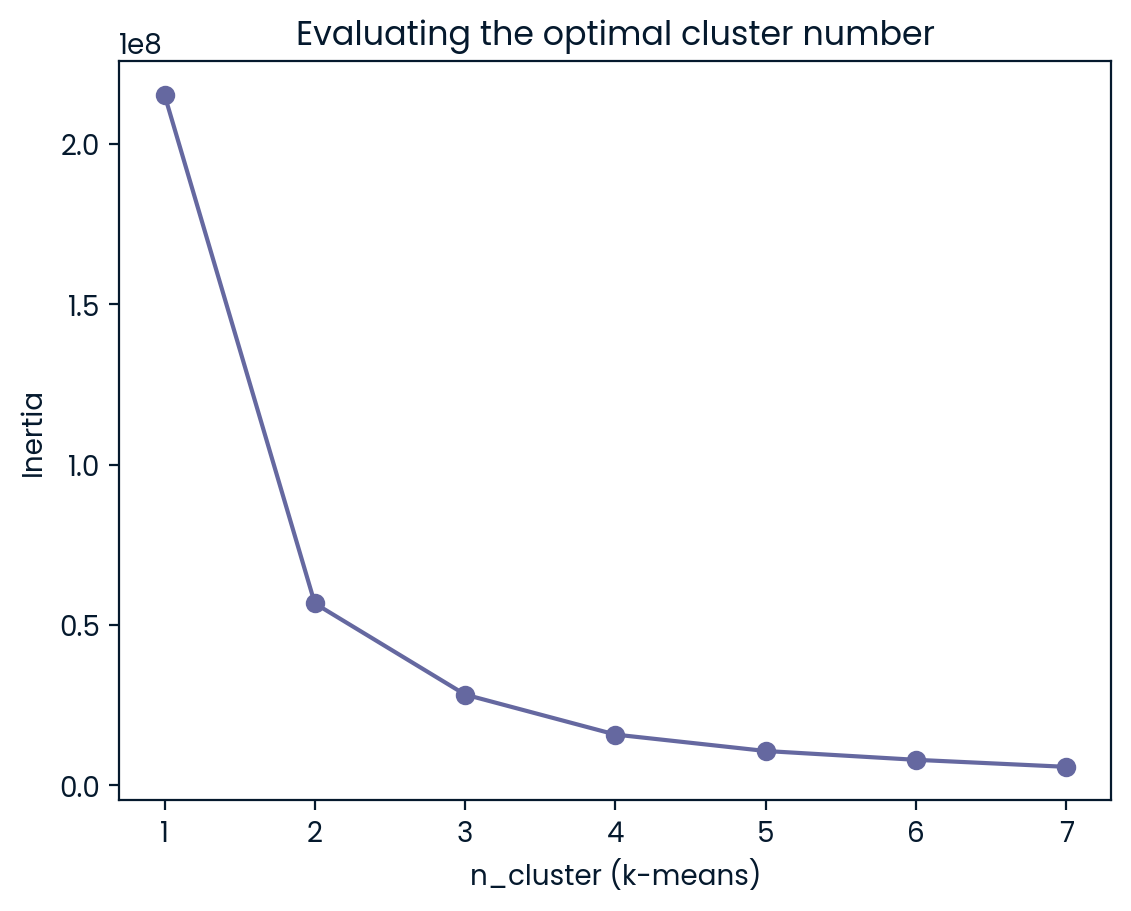

In [53]:
### Method 1: KMeans Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Use one-hot encoding to prepare categorical "sex" column for machine learning, i.e. create clean dataset without non-numerical columns (here: "sex"). pd.get_dummies() automatically removes the original column.
penguins_df_clean = pd.get_dummies(penguins_df, columns=["sex"])


# Finding the optimal number of clusters
# We know of (at least!) 3 penguin species (Adelie, Chinstrap, Gentoo), i.e. n_clusters=3. Since there could be more, we create different clusterings with different n_clusters using a for-loop, then calculate the cluster inertias and search for the "elbow" in the inertia(n_clusters)-plot to identify the optimal cluster number. Interpretation of Inertia: a measure for the cluster's "width" - the more clusters, the smaller the inertias; the smaller the inertias, the better the (mean) clustering quality. [I know it's tempting, but please don't use as many clusters as there are sample points. ;)].

ks = range(1,8)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)     
    kmeans.fit_transform(penguins_df_clean)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, "-o")
#sns.lineplot(x=ks, y=inertias, markers=ks)
plt.title("Evaluating the optimal cluster number")
plt.xlabel("n_cluster (k-means)")
plt.ylabel("Inertia")
plt.xticks(ks)
plt.show()

In [54]:
# Optimal cluster number: 2-4 --> choose 3
n_clusters_opt = 3

# Create a pipeline
scaler = StandardScaler()  # was sind sinnvolle Parameter hier?
kmeans = KMeans(n_clusters=n_clusters_opt, random_state=42)
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data and predict cluster labels
pipeline.fit_transform(penguins_df_clean)
penguins_cluster_labels = pipeline.predict(penguins_df_clean)

# Print the predicted penguin cluster labels
print("Penguin Cluster Labels:\n", penguins_cluster_labels)

Penguin Cluster Labels:
 [2 0 0 0 2 0 2 0 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0
 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 2
 0 2 0 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2
 2 0 2 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


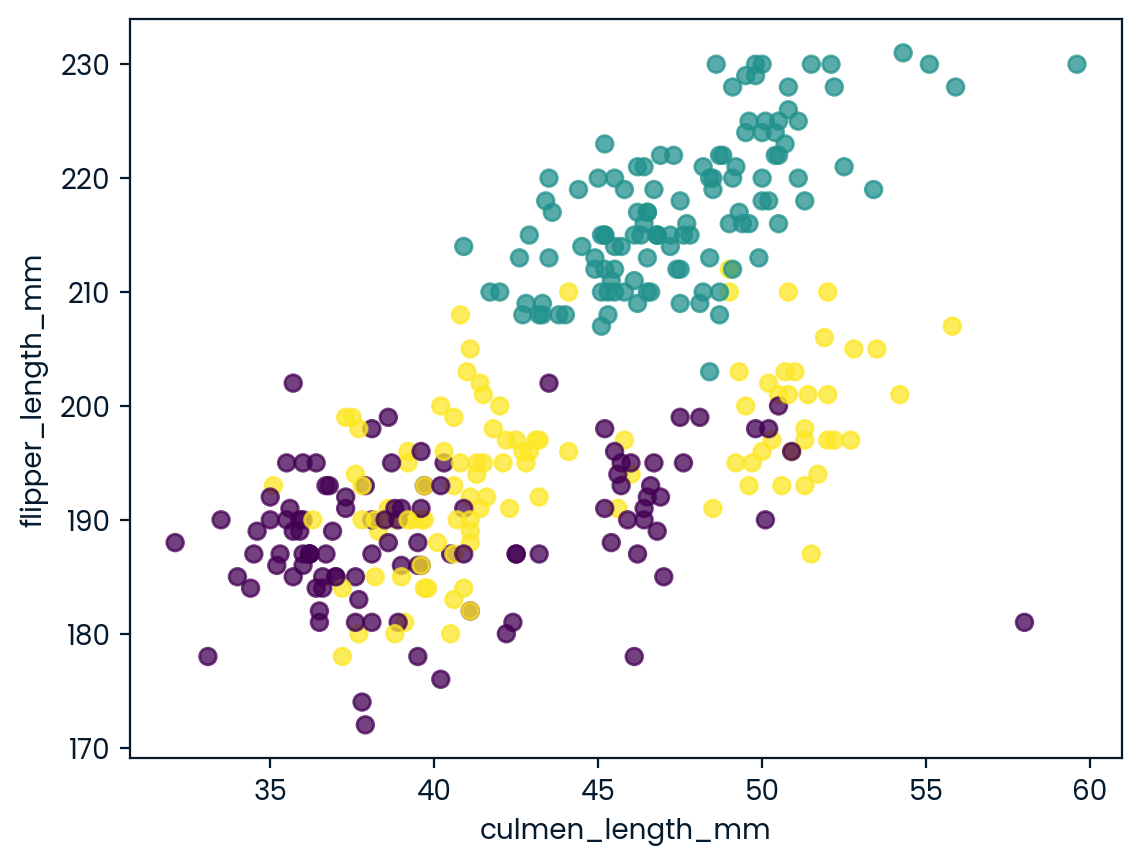

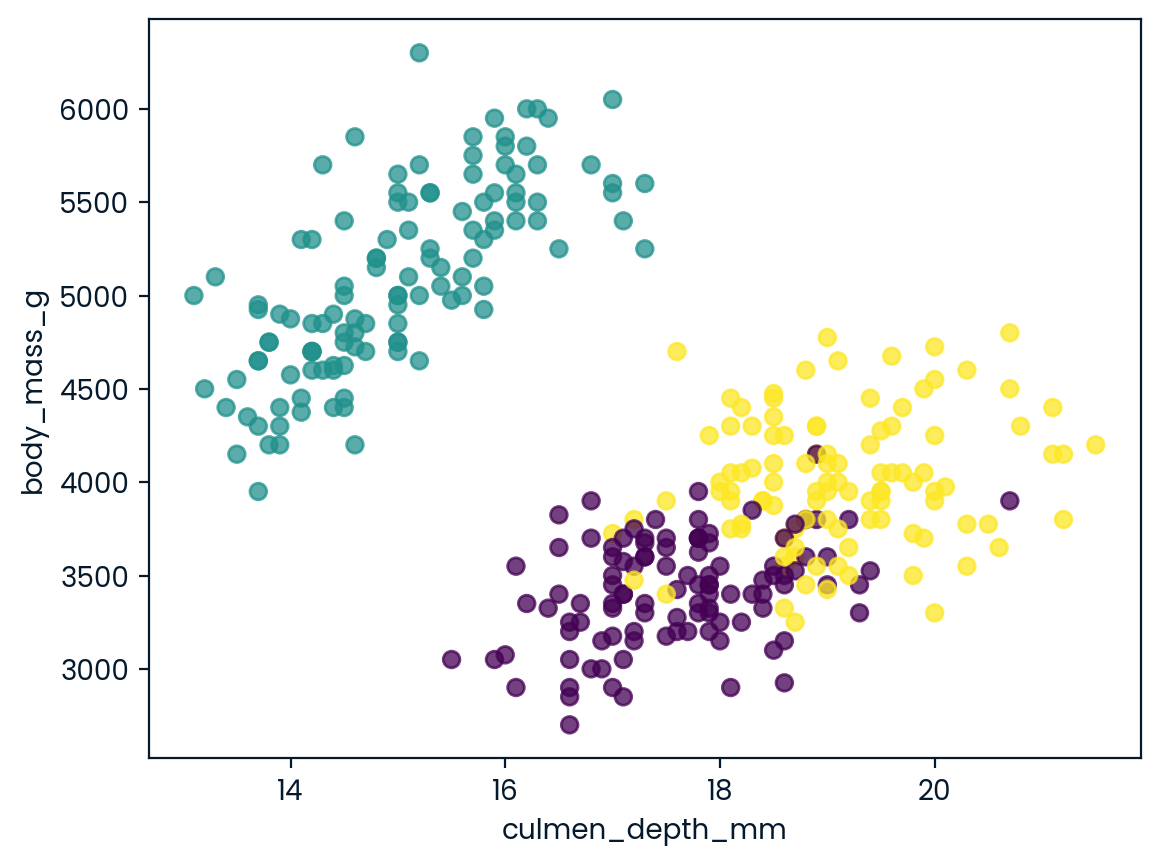

In [55]:
# Visualization
feature_1 = "culmen_length_mm"
feature_2 = "culmen_depth_mm"
feature_3 = "flipper_length_mm"
feature_4 = "body_mass_g"

#TODO: plot all combinations in subplots using double for-loop
# example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

plt.scatter(
    penguins_df_clean[feature_1], 
    penguins_df_clean[feature_3], 
    c=penguins_cluster_labels, 
    alpha=0.75
)
plt.xlabel(feature_1)
plt.ylabel(feature_3)
plt.show()

plt.scatter(
    penguins_df_clean[feature_2], 
    penguins_df_clean[feature_4], 
    c=penguins_cluster_labels, 
    alpha=0.75
)
plt.xlabel(feature_2)
plt.ylabel(feature_4)
plt.show()

In [56]:
# Calculate cluster statistics

penguins_species = ["Adelie", "Chinstrap", "Gentoo"]

penguins_clusters_df = penguins_df_clean.assign(label=penguins_cluster_labels)
penguins_clusters_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,2
1,39.5,17.4,186.0,3800.0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0
3,36.7,19.3,193.0,3450.0,1,0,0
4,39.3,20.6,190.0,3650.0,0,1,2
...,...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0,1
328,46.8,14.3,215.0,4850.0,1,0,1
329,50.4,15.7,222.0,5750.0,0,1,1
330,45.2,14.8,212.0,5200.0,1,0,1


In [57]:
stat_penguins = penguins_clusters_df.groupby(penguins_clusters_df["label"]).mean()
stat_penguins 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
label,,,,,,
0,40.217757,17.611215,189.046729,3419.158879,1.000000,0.000000
1,47.568067,14.996639,217.235294,5092.436975,0.487395,0.512605
2,43.878302,19.111321,194.764151,4006.603774,0.000000,1.000000


In [58]:
### Method 2: PCA (makes sense? what about NMF? discuss!)